<a href="https://colab.research.google.com/github/dineshkumarsarangapani/Machine_learning_IITM/blob/main/solutions/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]
plt.rcParams['font.size'] = 15

## np.random.choice(a, size=None)

**a:** 1-D array-like or int
If an ndarray, a random sample is generated from its elements. If an int, the random sample is generated as if it were np.arange(a).

**size:** Default is None, in which case a single value is returned.



In [379]:
x = np.random.choice([1,2,3], 10)
x

array([1, 2, 1, 2, 2, 1, 2, 2, 3, 1])

## np.random.seed()

Computers follow a set of instructions to do anything; to generate random numbers as well; they use some seed. Hence random numbers are not truly random, they are hence called pseudorandom numbers.

np.random.seed() makes the random number predictable.

In [380]:
np.random.seed(10)

## np.random.randn()

random.randn(d0, d1, ..., dn)

Return a sample (or samples) from the “standard normal” distribution.



In [381]:
np.random.randn(1,2,3)

array([[[ 1.3315865 ,  0.71527897, -1.54540029],
        [-0.00838385,  0.62133597, -0.72008556]]])

## np.random.randint(low, high, [size])


In [382]:
np.random.randint(1,20,3)

array([ 1, 11,  9])

## numpy.arange([start], stop, [step])

Goes from start to stop -1

default start = 0
default step = 1

In [383]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## np.concatenate()

np.concatenate((a1, a2, ...), axis=0)

Join a sequence of arrays along an existing axis.

a1, a2, …sequence of array_like

-  All the input arrays must have same number of dimensions

- The arrays must have the same shape, except in the dimension corresponding to axis.

axis = 0 means first axis

In [384]:
a= np.arange(0, 10, 1)
b= np.arange(10, 20, 1)
np.concatenate([a, b], axis=0)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

## np.linalg.norm() 
To get the vector norm.

In [385]:
a = np.arange(0, 6, 1)
a = a.reshape(3,-1)
print(a)
b = np.linalg.norm(a, axis=0, ord=2)
b

[[0 1]
 [2 3]
 [4 5]]


array([4.47213595, 5.91607978])

## np.linalg.norm(a-b) 

The distance between two vectors v and w is the length of the difference vector v - w.

So, np.linalg.norm(a-b) can be used to get the distance between a and b.

In [386]:
a = np.arange(0, 6, 1)
b = np.arange(6, 12, 1)
print(a)
print(a)
print(a-b)
c = np.linalg.norm(a-b, axis=0, ord=2)
c

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[-6 -6 -6 -6 -6 -6]


14.696938456699069

## np.argmin()

Returns the indices of the minimum values along an axis.
Default axis is None.

If axis = None, the array is flattened first.

In [387]:
a = np.arange(10, 60, 1)
a[np.argmin(a)]

10

##np.append(array, values, axis = None) 

Append values to the end of an array.

axis : The axis along which values are appended. If axis is not given, both arr and values are flattened before use.

all the input arrays must have same number of dimensions

Note: append only creates a view

In [388]:
a = np.arange(0, 6, 1)
b = np.arange(2, 12, 1)
c = np.append(a, b)
c

array([ 0,  1,  2,  3,  4,  5,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## np.mean(array, axis = None)
Compute the arithmetic mean along the specified axis.

default Axis = None means flatten and then find mean

In case of 1-d array, flattening does not make a difference.

In [389]:
b = np.arange(2, 12, 1)
np.mean(b)

6.5

## Broadcast

In [390]:
b = np.arange(2, 12, 1)
b = b**2
b

array([  4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

## Accessing array elements

In [391]:
b[0]

4



---



## Data generation for K-means

In [392]:
x = np.random.randn(10, 2) + np.array([10, 20])
print(x)

[[10.45187984 19.14052582]
 [ 9.46520547 21.03287114]
 [ 9.86376425 20.17637307]
 [10.31085074 21.72937588]
 [ 9.75933806 18.97264798]
 [10.42401507 21.40862087]
 [10.43999202 19.57176561]
 [ 9.68798732 19.43111661]
 [ 8.41505899 21.05535316]
 [ 8.07342089 20.69858388]]


In [393]:
np.random.seed(0)
N=2000
data_1 = np.random.randn(N//3, 2) + np.array([2,2])
data_2 = np.random.randn(N//3, 2) + np.array([-3,-3])
data_3 = np.random.randn(N//3, 2) + np.array([10,10])
X = np.concatenate([data_1, data_2, data_3])
X.shape

(1998, 2)

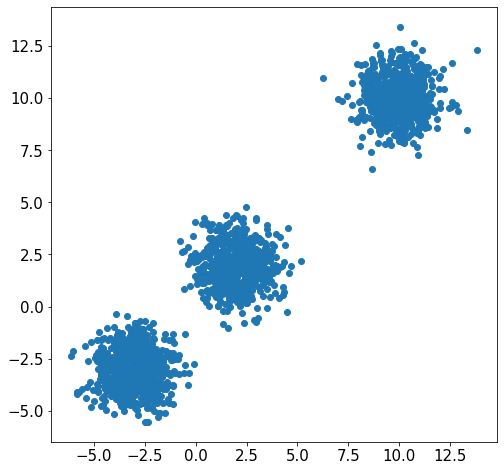

In [394]:
plt.scatter(X[:,0], X[:,1])

## Visualize data

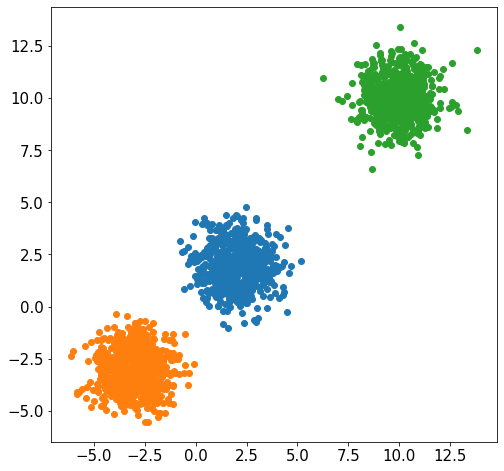

In [395]:
plt.scatter(data_1[:,0], data_1[:,1])
plt.scatter(data_2[:,0], data_2[:,1])
plt.scatter(data_3[:,0], data_3[:,1])

## Initialize cluster centers

In [396]:
k = 3
np.random.seed(10)
random_indcies = np.random.randint(0, X.shape[0], k)
print(random_indcies)

centers = X[random_indcies]
print(centers)

[1289 1149  527]
[[-4.26634268 -3.06149476]
 [-4.36294095 -3.79175652]
 [ 5.17097477  2.18949964]]


## Visualize the cluster centers as well

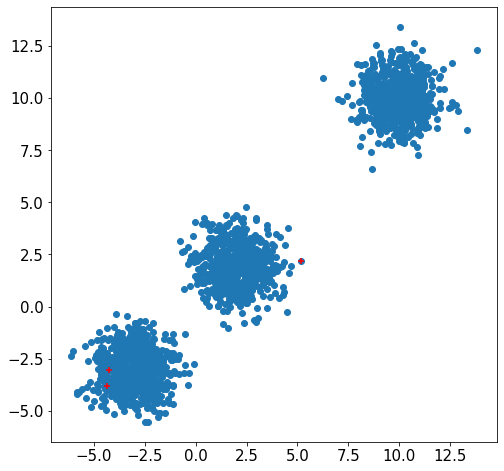

In [397]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0],centers[:,1], marker='+', color='red')

## Assign data points to these three clusters (store this information in the cluster indicator (z)) 

<!-- Compute cluster indicator (z) -->

In [398]:
def identify_cluster_centers(X, centers, k):
  Z = np.array([])
  # print(centers)
  for each in X:
    # print(each)
    distance_from_each_other = [np.linalg.norm(each - centers[i]) for i in range(k)]
    # print(distance_from_each_other)
    Z = np.append(Z, np.argmin(distance_from_each_other))
  return Z

Z = identify_cluster_centers(X, centers, k) # assinged all the clusters based on the distance
Z

array([2., 2., 2., ..., 2., 2., 2.])

## Visualize the clusters formed as per this z.

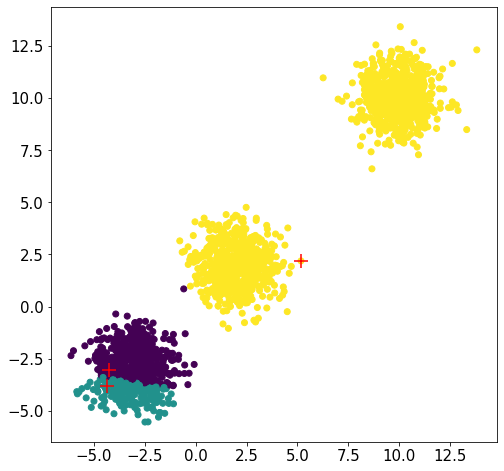

In [399]:
plt.scatter(X[:,0], X[:,1], c=Z)
plt.scatter(centers[:,0],centers[:,1], marker='+', color='red', s=200)

## Compute updated cluster centers

In [400]:
def calculate_cluter_centers(X, Z, k):
  updated_centers = np.array([np.mean(X[Z == i], axis=0) for i in range(k)]) # find mean for each clusters to find the new centers
  # print("updated_centers", updated_centers)
  return updated_centers

## Iterations involving 

(a) re-assigning data points to new clusters as per the new cluster centers formed.

(b) Re-compute cluster centers

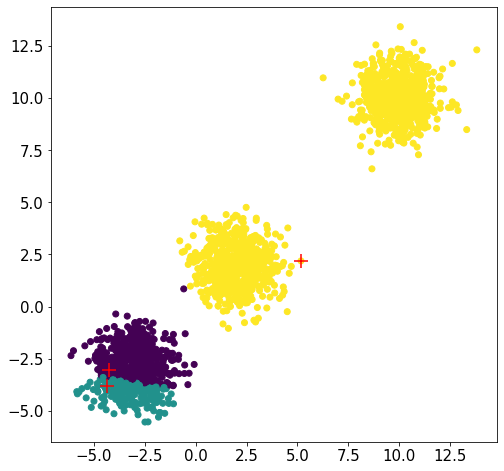

[[-2.95787405 -2.53085684]
 [-3.25620048 -4.13770652]
 [ 5.95814493  5.98702566]]


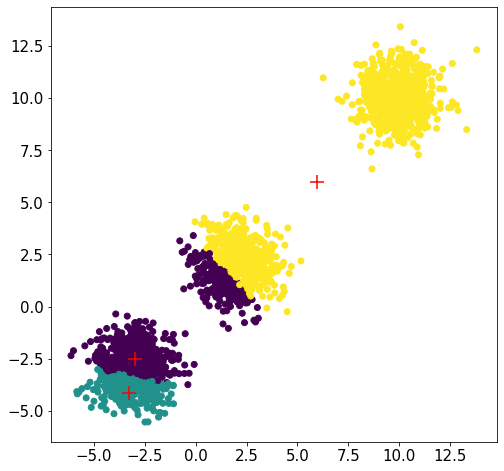

[[-1.58108367 -1.2390948 ]
 [-3.20363522 -3.9908666 ]
 [ 6.84165942  6.8873867 ]]


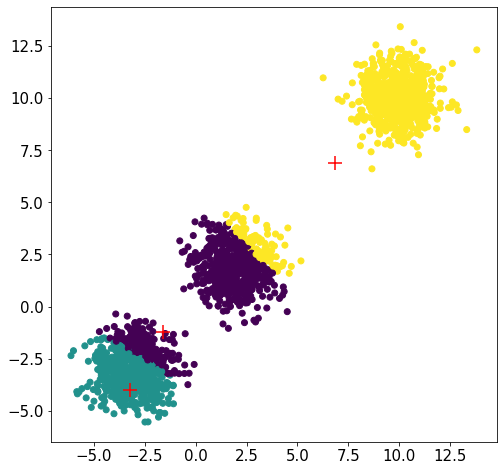

[[ 0.82946106  0.9227955 ]
 [-3.25721578 -3.33855887]
 [ 9.04915793  9.11632363]]


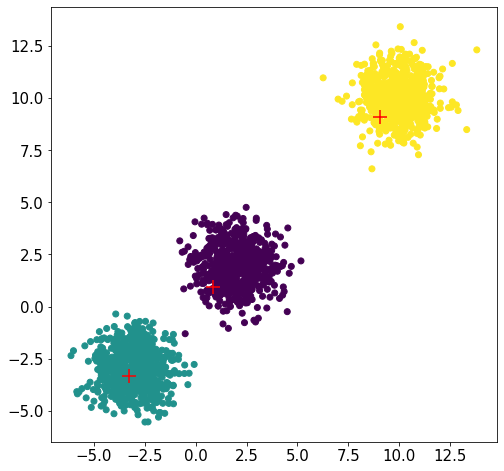

[[ 1.98474381  1.95532431]
 [-3.04856595 -2.98721439]
 [ 9.91797662 10.0061139 ]]


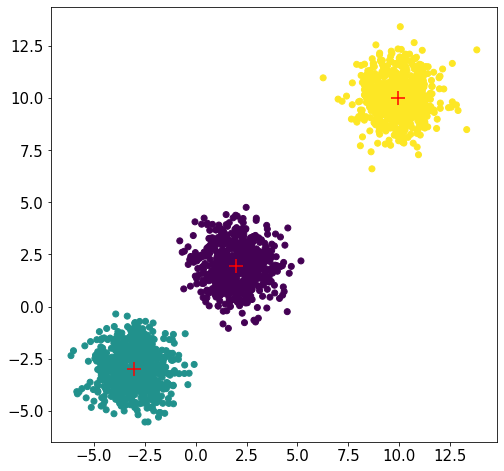

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


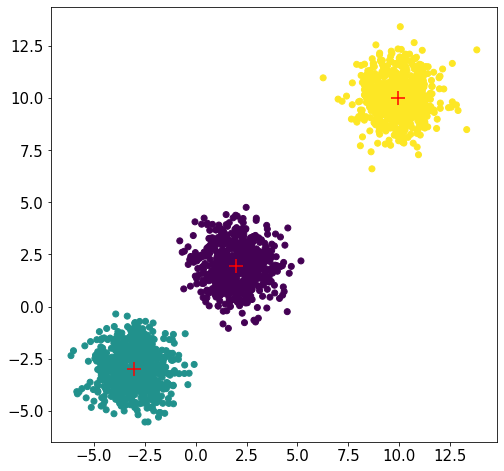

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


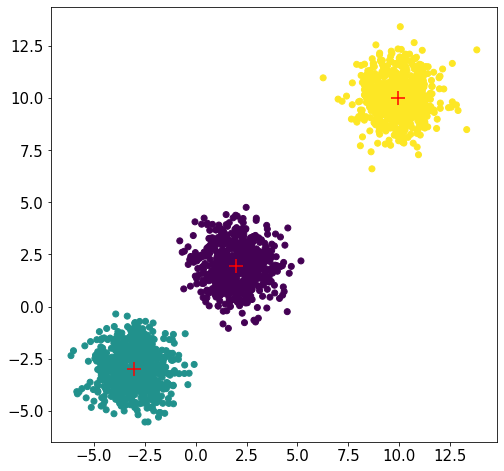

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


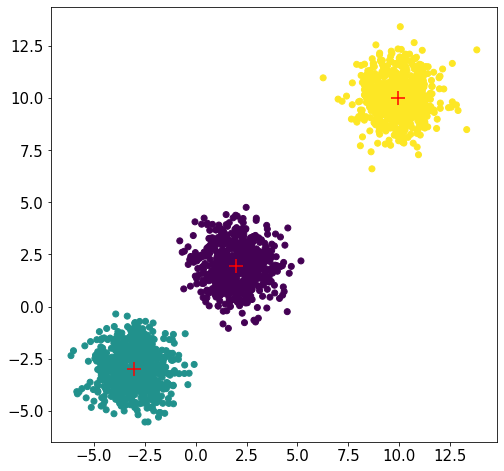

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


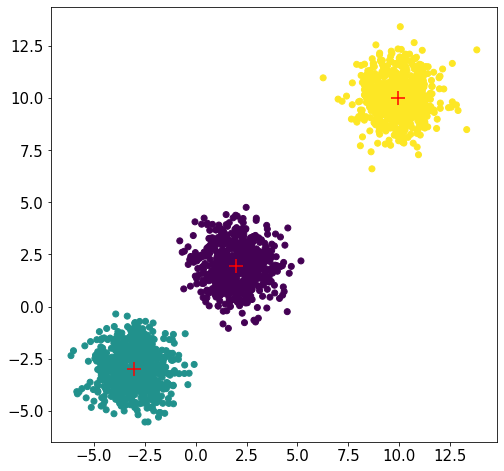

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


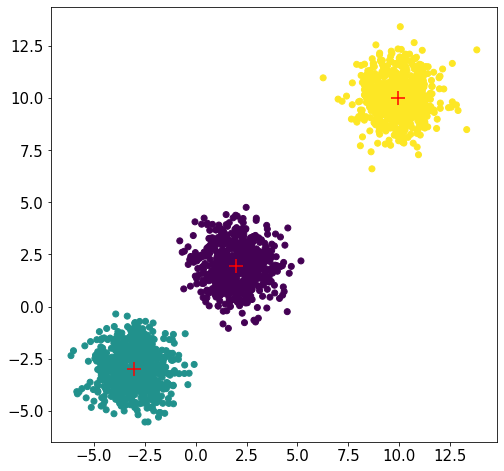

[[ 1.98849202  1.96021824]
 [-3.04475663 -2.98468709]
 [ 9.91797662 10.0061139 ]]


In [401]:
for i in range(10):
  # print(centers)
  Z = identify_cluster_centers(X, centers, k) # assinged all the  clusters based on the distance
  plt.scatter(X[:,0], X[:,1], c=Z)
  plt.scatter(centers[:,0],centers[:,1], marker='+', s=200, color='red')
  plt.show()
  centers = calculate_cluter_centers(X, Z, k)
  # print(X.shape)
  print(centers)
  